In [1]:
# Importing all th Important Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Over sampling to balance the imabalanced data.
from imblearn.over_sampling import RandomOverSampler

#Importing train_test_split to split into traning and testing data.
from sklearn.model_selection import train_test_split

#Importing Randomforestclassifier to create a model.
from sklearn.ensemble import RandomForestClassifier

#Importing Accuracy score and classification report to check the accuracy.
from sklearn.metrics import classification_report, accuracy_score

#Importing the kfold and cross validation.
from sklearn.model_selection import KFold, cross_val_score

In [3]:
# Importing Dataset
df = pd.read_csv("/content/hypothyroid.csv")

In [9]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [6]:
df.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,2
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,P
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


##Checking for missing values

In [10]:
#Replacing "?" with nan
df.replace("?", np.nan, inplace=True)

In [11]:
#Checking if any missing values
df.isnull().sum()

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

In [13]:
# Droping TBG because its empty contains 3772 missing values
df.drop(["TBG"], axis=1, inplace=True)

In [14]:
#Dropping missing values
df.dropna(inplace=True)

In [15]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,2.5,t,125,t,1.14,t,109,f,SVHC,P
4,70,F,f,f,f,f,f,f,f,f,...,1.2,t,61,t,0.87,t,70,f,SVI,P
7,80,F,f,f,f,f,f,f,f,f,...,0.6,t,80,t,0.7,t,115,f,SVI,P
8,66,F,f,f,f,f,f,f,f,f,...,2.2,t,123,t,0.93,t,132,f,SVI,P
9,68,M,f,f,f,f,f,f,f,f,...,1.6,t,83,t,0.89,t,93,f,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,19,F,f,f,f,f,f,f,f,f,...,2.7,t,108,t,1.11,t,97,f,other,N
3768,68,F,f,f,f,f,f,f,f,f,...,2.1,t,124,t,1.08,t,114,f,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,1.8,t,112,t,1.07,t,105,f,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,2,t,82,t,0.94,t,87,f,SVI,P


#Feature Selection

In [16]:
#Checking the catagorical features and there unique values
for c in df:
    if df[c].dtype == "O":
        print(df[c].value_counts())
        print("="*50)

59    72
70    69
73    66
60    63
55    63
      ..
2      1
91     1
6      1
94     1
92     1
Name: age, Length: 92, dtype: int64
F    1764
M     879
Name: sex, dtype: int64
f    2377
t     266
Name: on thyroxine, dtype: int64
f    2619
t      24
Name: query on thyroxine, dtype: int64
f    2610
t      33
Name: on antithyroid medication, dtype: int64
f    2530
t     113
Name: sick, dtype: int64
f    2602
t      41
Name: pregnant, dtype: int64
f    2610
t      33
Name: thyroid surgery, dtype: int64
f    2603
t      40
Name: I131 treatment, dtype: int64
f    2497
t     146
Name: query hypothyroid, dtype: int64
f    2480
t     163
Name: query hyperthyroid, dtype: int64
f    2629
t      14
Name: lithium, dtype: int64
f    2623
t      20
Name: goitre, dtype: int64
f    2585
t      58
Name: tumor, dtype: int64
f    2642
t       1
Name: hypopituitary, dtype: int64
f    2473
t     170
Name: psych, dtype: int64
t    2643
Name: TSH measured, dtype: int64
0.2     97
1.3     89
1.1     76
1.5 

In [20]:
df["TBG measured"].value_counts()

f    2643
Name: TBG measured, dtype: int64

####Dropping features which only containg one value so need to keep those features

In [22]:
#Dropping unnecessary features
df.drop(["TSH measured"], axis=1, inplace=True)
df.drop(["T3 measured"], axis=1, inplace=True)
df.drop(["TT4 measured"], axis=1, inplace=True)
df.drop(["T4U measured"], axis=1, inplace=True)
df.drop(["FTI measured"], axis=1, inplace=True)
df.drop(["TBG measured"], axis=1, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2643 entries, 0 to 3771
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        2643 non-null   object
 1   sex                        2643 non-null   object
 2   on thyroxine               2643 non-null   object
 3   query on thyroxine         2643 non-null   object
 4   on antithyroid medication  2643 non-null   object
 5   sick                       2643 non-null   object
 6   pregnant                   2643 non-null   object
 7   thyroid surgery            2643 non-null   object
 8   I131 treatment             2643 non-null   object
 9   query hypothyroid          2643 non-null   object
 10  query hyperthyroid         2643 non-null   object
 11  lithium                    2643 non-null   object
 12  goitre                     2643 non-null   object
 13  tumor                      2643 non-null   object
 14  hypopitu

#**Taking Care of Catagorical Data**

In [24]:
# Using loop to gaet those features which only contains 2 catagorical data
list_of_catagorical_columns = []
for c in df:
    if df[c].dtype == "O":
        print(df[c].value_counts())
        print("="*50)
        list_of_catagorical_columns.append(c)

59    72
70    69
73    66
60    63
55    63
      ..
2      1
91     1
6      1
94     1
92     1
Name: age, Length: 92, dtype: int64
F    1764
M     879
Name: sex, dtype: int64
f    2377
t     266
Name: on thyroxine, dtype: int64
f    2619
t      24
Name: query on thyroxine, dtype: int64
f    2610
t      33
Name: on antithyroid medication, dtype: int64
f    2530
t     113
Name: sick, dtype: int64
f    2602
t      41
Name: pregnant, dtype: int64
f    2610
t      33
Name: thyroid surgery, dtype: int64
f    2603
t      40
Name: I131 treatment, dtype: int64
f    2497
t     146
Name: query hypothyroid, dtype: int64
f    2480
t     163
Name: query hyperthyroid, dtype: int64
f    2629
t      14
Name: lithium, dtype: int64
f    2623
t      20
Name: goitre, dtype: int64
f    2585
t      58
Name: tumor, dtype: int64
f    2642
t       1
Name: hypopituitary, dtype: int64
f    2473
t     170
Name: psych, dtype: int64
0.2     97
1.3     89
1.1     76
1.5     70
1.6     69
        ..
0.23     1
143

In [27]:
list_of_catagorical_columns

['age',
 'sex',
 'on thyroxine',
 'query on thyroxine',
 'on antithyroid medication',
 'sick',
 'pregnant',
 'thyroid surgery',
 'I131 treatment',
 'query hypothyroid',
 'query hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH',
 'T3',
 'TT4',
 'T4U',
 'FTI',
 'referral source',
 'binaryClass']

In [30]:
#  This columns only have those features which have 2 catagorical data
list_of_catagorical_columns = ['sex',
 'on thyroxine',
 'query on thyroxine',
 'on antithyroid medication',
 'sick',
 'pregnant',
 'thyroid surgery',
 'I131 treatment',
 'query hypothyroid',
 'query hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych']

In [31]:
# OneHotEncoding
for i in list_of_catagorical_columns:
    df[i] = pd.get_dummies(df[i], drop_first=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2643 entries, 0 to 3771
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        2643 non-null   object
 1   sex                        2643 non-null   uint8 
 2   on thyroxine               2643 non-null   uint8 
 3   query on thyroxine         2643 non-null   uint8 
 4   on antithyroid medication  2643 non-null   uint8 
 5   sick                       2643 non-null   uint8 
 6   pregnant                   2643 non-null   uint8 
 7   thyroid surgery            2643 non-null   uint8 
 8   I131 treatment             2643 non-null   uint8 
 9   query hypothyroid          2643 non-null   uint8 
 10  query hyperthyroid         2643 non-null   uint8 
 11  lithium                    2643 non-null   uint8 
 12  goitre                     2643 non-null   uint8 
 13  tumor                      2643 non-null   uint8 
 14  hypopitu

In [33]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,binaryClass
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,1.3,2.5,125,1.14,109,SVHC,P
4,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0.72,1.2,61,0.87,70,SVI,P
7,80,0,0,0,0,0,0,0,0,0,...,0,0,0,2.2,0.6,80,0.7,115,SVI,P
8,66,0,0,0,0,0,0,0,0,0,...,1,0,0,0.6,2.2,123,0.93,132,SVI,P
9,68,1,0,0,0,0,0,0,0,0,...,0,0,0,2.4,1.6,83,0.89,93,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,19,0,0,0,0,0,0,0,0,0,...,0,0,0,8.8,2.7,108,1.11,97,other,N
3768,68,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2.1,124,1.08,114,SVI,P
3769,74,0,0,0,0,0,0,0,0,0,...,0,0,0,5.1,1.8,112,1.07,105,other,P
3770,72,1,0,0,0,0,0,0,0,0,...,0,0,0,0.7,2,82,0.94,87,SVI,P


In [34]:
list_of_catagorical_columns = []
for c in df:
    if df[c].dtype == "O":
        print(df[c].value_counts())
        print("="*50)
        list_of_catagorical_columns.append(c)

59    72
70    69
73    66
60    63
55    63
      ..
2      1
91     1
6      1
94     1
92     1
Name: age, Length: 92, dtype: int64
0.2     97
1.3     89
1.1     76
1.5     70
1.6     69
        ..
0.23     1
143      1
0.49     1
10.3     1
40       1
Name: TSH, Length: 270, dtype: int64
2      206
1.8    182
2.2    175
2.3    169
1.9    162
      ... 
4.6      1
5        1
5.2      1
4.8      1
5.7      1
Name: T3, Length: 67, dtype: int64
101    52
103    50
93     50
102    48
94     44
       ..
27      1
289     1
240     1
43      1
216     1
Name: TT4, Length: 228, dtype: int64
0.99    78
1.01    72
0.89    72
0.92    71
1.02    69
        ..
1.71     1
1.76     1
1.56     1
0.31     1
0.25     1
Name: T4U, Length: 141, dtype: int64
100    56
93     56
114    53
96     52
104    52
       ..
232     1
175     1
235     1
48      1
35      1
Name: FTI, Length: 219, dtype: int64
other    1237
SVI       929
SVHC      359
STMW       84
SVHD       34
Name: referral source, dtype:

In [35]:
list_of_catagorical_columns

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'referral source', 'binaryClass']

In [36]:
# this list contains the reamining features which are object dtype need to convert them into numeric dtype
list_of_catagorical_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [37]:
#Using loop to convert the dtype of object in list
for i in list_of_catagorical_columns:
    df[i] = pd.to_numeric(df[i])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2643 entries, 0 to 3771
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2643 non-null   int64  
 1   sex                        2643 non-null   uint8  
 2   on thyroxine               2643 non-null   uint8  
 3   query on thyroxine         2643 non-null   uint8  
 4   on antithyroid medication  2643 non-null   uint8  
 5   sick                       2643 non-null   uint8  
 6   pregnant                   2643 non-null   uint8  
 7   thyroid surgery            2643 non-null   uint8  
 8   I131 treatment             2643 non-null   uint8  
 9   query hypothyroid          2643 non-null   uint8  
 10  query hyperthyroid         2643 non-null   uint8  
 11  lithium                    2643 non-null   uint8  
 12  goitre                     2643 non-null   uint8  
 13  tumor                      2643 non-null   uint8

In [40]:
#Dropping the referal source feature
df.drop(["referral source"], axis=1, inplace=True)

In [56]:
df.binaryClass.value_counts()

P    2427
N     216
Name: binaryClass, dtype: int64

In [57]:
# Replacing the values "negative":0, "compensated_hypothyroid":1, "primary_hypothyroid":2, "secondary_hypothyroid":3 from class feature
df["binaryClass"].replace({"N":0, "P":1}, inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2643 entries, 0 to 3771
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2643 non-null   int64  
 1   sex                        2643 non-null   uint8  
 2   on thyroxine               2643 non-null   uint8  
 3   query on thyroxine         2643 non-null   uint8  
 4   on antithyroid medication  2643 non-null   uint8  
 5   sick                       2643 non-null   uint8  
 6   pregnant                   2643 non-null   uint8  
 7   thyroid surgery            2643 non-null   uint8  
 8   I131 treatment             2643 non-null   uint8  
 9   query hypothyroid          2643 non-null   uint8  
 10  query hyperthyroid         2643 non-null   uint8  
 11  lithium                    2643 non-null   uint8  
 12  goitre                     2643 non-null   uint8  
 13  tumor                      2643 non-null   uint8

##**Independent and Dependent Variable.**
* X as independent variable.
* y as dependent/target variable.

In [59]:
x = df.iloc[:, :21]   # independent
y = df.iloc[:, 21]    # Dependent

In [60]:
x

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1.30,2.5,125.0,1.14,109.0
4,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.72,1.2,61.0,0.87,70.0
7,80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2.20,0.6,80.0,0.70,115.0
8,66,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.60,2.2,123.0,0.93,132.0
9,68,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2.40,1.6,83.0,0.89,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,8.80,2.7,108.0,1.11,97.0
3768,68,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1.00,2.1,124.0,1.08,114.0
3769,74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5.10,1.8,112.0,1.07,105.0
3770,72,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.70,2.0,82.0,0.94,87.0


In [61]:
y

0       1
4       1
7       1
8       1
9       1
       ..
3766    0
3768    1
3769    1
3770    1
3771    1
Name: binaryClass, Length: 2643, dtype: int64

##**Taking care of imbalanced data**

In [67]:
df.binaryClass.value_counts()

1    2427
0     216
Name: binaryClass, dtype: int64

<Axes: xlabel='binaryClass', ylabel='count'>

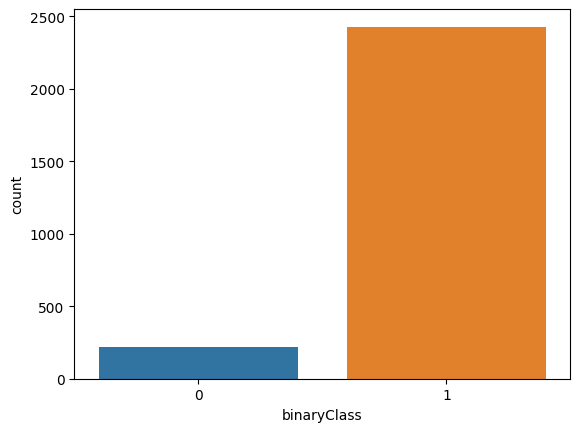

In [93]:
#Checking the imabalanced data
sns.countplot(x=y,data=df)

In [70]:
# Using Over sampling

# strategy = {0:2427, 1:1200, 2:700, 3:300}

os = RandomOverSampler()
x_res, y_res = os.fit_resample(x, y)

<Axes: xlabel='binaryClass', ylabel='count'>

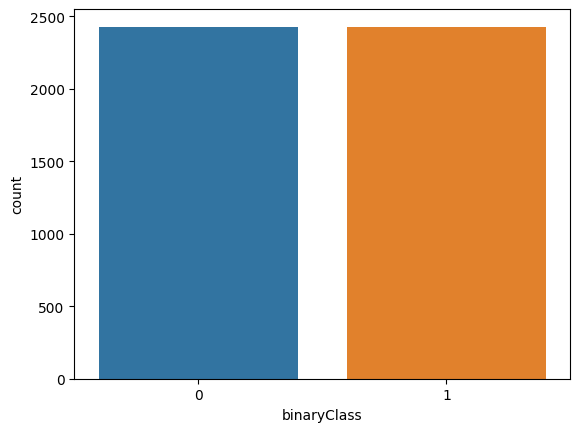

In [94]:
# Result after balancing the data
sns.countplot(x=y_res,data=df)

#**Spliting into traing and testing data**

In [76]:
# sPliting into traing and testing
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

In [78]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(X_test.shape)

(3883, 21)
(971, 21)
(3883,)
(971, 21)


#**Creating Model**
*Using RandomForestClassifier because it was giving more accuracy.*

In [79]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [80]:
# Predicting using testing data
y_pred = rf.predict(X_test)

## **Checking the accuracy**

In [81]:
 accuracy_score(y_test, y_pred)

0.9969104016477858

In [83]:
rf.score(X_train, y_train)

1.0

In [84]:
rf.score(X_test, y_test)

0.9969104016477858

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       485
           1       1.00      0.99      1.00       486

    accuracy                           1.00       971
   macro avg       1.00      1.00      1.00       971
weighted avg       1.00      1.00      1.00       971



In [86]:
cv1 = KFold(n_splits=10, random_state=1, shuffle=True)
scores1 = cross_val_score(rf, X_res, y_res, scoring='accuracy', cv=cv1)
scores1

array([0.99794239, 1.        , 0.99588477, 0.99794239, 0.99793814,
       0.99587629, 1.        , 0.99587629, 0.99587629, 1.        ])